### Dependencies

In [1]:
# !pip install pypdf langchain langchain_core langchain_community langchain_huggingface langchain_groq sentence_transformers transformers langchain_google_genai faiss-cpu langchain_openai grandalf pypdf pymupdf

In [2]:
# !pip install --quiet langchain_experimental

### Loading PDF

In [4]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader("GSTsmartGuide.pdf")

In [5]:
docs = loader.load()
docs[11]

Document(metadata={'producer': 'Microsoft® Word 2013', 'creator': 'Microsoft® Word 2013', 'creationdate': '2024-02-27T11:53:51+05:30', 'source': 'GSTsmartGuide.pdf', 'file_path': 'GSTsmartGuide.pdf', 'total_pages': 1321, 'format': 'PDF 1.6', 'title': 'CHAPTER 1', 'author': 'Abha', 'subject': '', 'keywords': '', 'moddate': '2024-02-27T13:03:27+05:30', 'trapped': '', 'modDate': "D:20240227130327+05'30'", 'creationDate': "D:20240227115351+05'30'", 'page': 11}, page_content='Contents \n11 \nChapter \nTopic Subject wise \nSection of \nCGST \nAct \nRule of  \nCGST \nRules \nPage \nNo. \nChapter 48 \nRefund of IGST on Supplies to \nSEZ Unit/Developer of SEZ \non Payment of IGST \n \n \n927 \nChapter 49 \nTaxability \nof \nGovernment \nServices under GST \n \n \n935 \nChapter 50 \nGST Compensation Cess  \n \n \n948 \nChapter 51 \nGST on Cooperative Housing \nSocieties \n \n \n954 \nChapter 52 \nGST \non \nCharitable \nand \nReligious Trusts \n \n \n960 \nChapter 53 \nGST - MSME \n \n \n968 \nC

In [6]:
all_page_content = [doc.page_content for doc in docs]

In [7]:
len(all_page_content)

1321

In [8]:
all_page_content

['',
 "Bharat's \nG S T   \nSmart Guide  \n \n \n \n \n \n \n \n \nC\nO\nM\nM\nI\nT\nT\nE\nD\nT\nO\nQ\nU\nA\nL\nI\nT\nY\nA\nN\nD\nE\nX\nC\nE\nL\nL\nE\nN\nC\nE",
 'Opportunity rarely knocks twice. For years, \nyou have dreamt to be an AUTHOR. Here is \njust the right time for you to fulfil your dreams \ninto reality. Bharat opens its doors to Authors \nfor a wide range of books. \nBharat are one of the leading law book \npublishers and need no introduction. Bharat is a \nfamiliar word with the chartered accountants, \ncompany secretaries, corporate executives, \nconsultants, lawyers, students, etc. \nBharat invites proposals from authors having \nready manuscripts or those interested in \nwriting books to please get in touch with us.',
 "Bharat's \nG S T   \nSmart Guide  \n(A comprehensive practitioner’s companion to  \nGST law with Charts, Tables, Notifications, Circulars, \nInstructions, Advance Rulings & Case Laws) \n \n \n \n \n \n \nRAMESH CHANDRA JENA \nAdvocate \n \n \n \n \n \n 

## Semantic chunking By Langchain

**HugginFace Embeddings**

In [9]:
from langchain_huggingface import HuggingFaceEmbeddings
huggingface_embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
from langchain_experimental.text_splitter import SemanticChunker
text_splitter = SemanticChunker(huggingface_embeddings,breakpoint_threshold_type="percentile")

In [12]:
semantic_docs = text_splitter.create_documents(all_page_content)

In [17]:
semantic_docs[30]

Document(metadata={}, page_content='2. Clarification on exports related issues \n37/11/2018-GST, \ndated 15-3-2018 \n1177 \n3. Allows of factory Stuffing and sealing of \nrefer containers with perishables \n13/2018-Cus., \ndated 30-5-2018 \n1183 \n4. Export Procedure to Bangladesh \n42/2018-Cus.-LC, \ndated 2-11-2018 \n1184 \n5. Transportation of goods to and from India \nthrough a foreign Territory-Reg. 14/2020-Cus dated \n21-2-2020 \n1186 \n6. Enabling export of Bangladesh goods to \nIndia by rail in closed containers \n8/2022-Customs, \ndated 17-5-2022 \n1191 \n7. Customs procedure for export of cargo in \nclosed containers from ICDs to Bangladesh \nusing inland waterways \n17/2022-Customs, \ndated 9-9-22 \n1193 \n8. Export of Services u/s 2(6)(iv) of the Act, \n2017 \n202/14/2023/GST/\n27-10-2023 \n1197 \n10.')

### Using Groq LLM

In [171]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It",api_key="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")

In [172]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate(
    input_variables=["context", "question"],
    template="""
You are a professional legal and tax assistant. Use the following context extracted from a GST reference guide to answer the user’s question as accurately and completely as possible.

If the answer is not found in the context, say “The document does not contain this information.”

-----------------------
Context:
{context}
-----------------------

Question: {question}

Answer:"""


)


In [1]:
# pip install chromadb

In [175]:
from langchain.vectorstores import Chroma

# Create Chroma vectorstore
vdb = Chroma.from_documents(semantic_docs, embedding=huggingface_embeddings, persist_directory="./database")
vdb.persist()

# Similarity search
query = '''The compliance of Statutory provisions u/s 16(2) of the Act and how to
prove that conditions has been satisfied by the taxpayer in order to discharge the
burden of proof and to ensure right to avail ITC by the documentary evidences
are summarised as under: '''
results = vdb.similarity_search(query, k=1)

for doc in results:
    print("📄 Match:", doc.page_content)
    print("📝 Metadata:", doc.metadata)


📄 Match: To ensure uniformity in the implementation of the provisions of the law 
across the field formations, the Board, in exercise of its powers conferred under 
section 168(1) of the CGST Act hereby clarifies various issues in succeeding 
paragraphs. 3. The conditions and eligibility for the ITC that may be availed by the 
recipient shall continue to be governed as per the provisions of Chapter V of the 
CGST Act and the rules made thereunder. This being a new provision, the 
restriction is not imposed through the common portal and it is the responsibility 
of the taxpayer that credit is availed in terms of the said rule and therefore, the 
availment of restricted credit in terms of sub-rule (4) of rule 36 of CGST Rules 
shall be done on self-assessment basis by the tax payers. Various issues relating 
to implementation of the said sub-rule have been examined and the clarification 
on each of these points is as under:— 
Sl. No 
Issue 
Clarification 
1. What are the invoices/debit 


<ipython-input-175-5060e419eea3>:5: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vdb.persist()


**Retriever**

In [176]:
retriever=vdb.as_retriever()

In [178]:
result=retriever.invoke('''Possession of tax
invoice/debit note
issued by a supplier
registered under this
Act. ''')
result

[Document(metadata={}, page_content='Chap. 10 \nTax Invoice, Credit and Debit Notes \n251 \n \nIn order to regularize these kinds of situations the supplier is allowed to issue \nwhat is called as debit note to the recipient. The note also includes supplementary \ninvoice. Therefore, the requirement of issuance of debit note is to settle the \ncorrect transaction between supplier and buyer in the GST regime. 31. Meaning of Debit Note \nSection 34(3) of CGST Act, 2017 has defined the meaning of debit note and \nspecified that where one or more tax invoice have been issued for supply of any \ngoods or services or both and the taxable value or tax charged in that tax invoice \nis found to be less than the taxable value or tax payable in respect of such supply, \nthe registered person, who has supplied such goods or services or both, shall \nissue to the recipient one or more debit notes for supplies made in a financial \nyear a debit note containing the prescribed particulars. 32. Format 

In [179]:
from langchain.chains import RetrievalQA

qa_chain = RetrievalQA.from_chain_type(
    llm=llm,  # your Groq LLM instance
    retriever=retriever,
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt_template}
)

In [180]:
query = ''' What is the effective date of composition levy explain in detail?  '''
result = qa_chain.run(query)

print(result)

<ipython-input-180-a4b8ccc0552a>:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain.run(query)


The effective date of composition levy depends on when a taxpayer opts into the scheme:


**Situation 1: Provisional Registration and Opting for Composition Levy**

* If a person has been granted provisional registration and chooses to pay tax under the composition scheme by filing FORM GST CMP-01 under Rule 3(1), the effective date of composition levy is **1st July, 2017**.

**Situation 2: Opting for Composition Levy During New Registration**

* If a person opts for the composition scheme at the time of applying for new registration in FORM GST REG-01 under Rule 3(2), the effective date of composition levy is the **effective date of registration**. 
    * The intimation for composition levy will only be considered after registration is granted. 
    * The taxpayer's option to pay tax under the composition scheme becomes effective from the registration date.

**Situation 3: Opting for Composition Levy After Obtaining Registration**

* If a person opts for the composition scheme after a

output : Markdown Preview

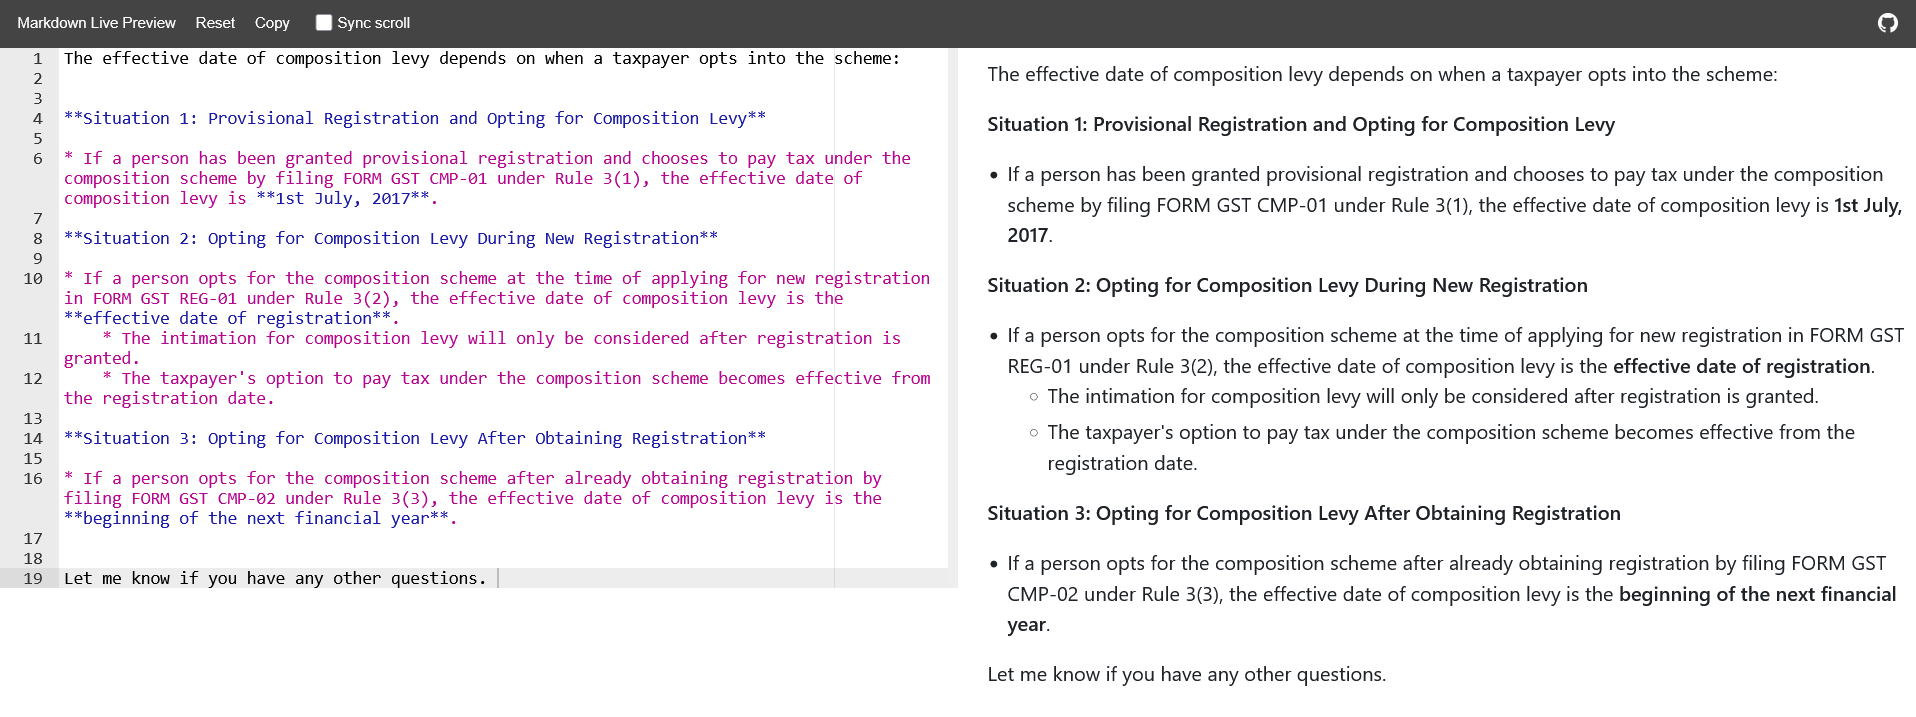

In [181]:
query = '''Possession of tax
invoice/debit note
issued by a supplier
registered under this
Act. '''
result = qa_chain.run(query)

print(result)

The document states:  "Invoice issued by supplier under Section 31(1)(2) of the Act, Debit note under Section 34 of the Act, Self invoice against RCM payment u/s 31(3)(f) of the Act and bill of entry as per the Customs Act,1962"  


Additionally, the document provides information about the particulars required on a debit note. 



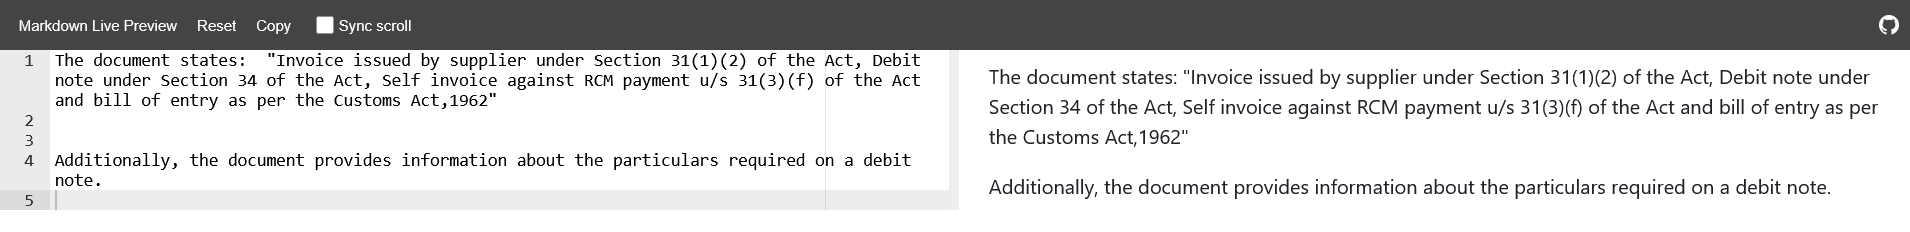

___

In [192]:
query = '''ITC would be available on invisible loss of inputs caused during
manufacturing process'''
result = qa_chain.run(query)

print(result)

The document states:  

> The Honorable High Court observed that impugned assessment orders 
> rejected a portion of ITC claimed. But the situations as set out in clause (h) of 
> Section 17(5) indicate loss of inputs that are quantifiable, and involve external 
> factors or compulsions. A loss that is occasioned by consumption in the process 
> of manufacture is one which is inherent to the process of manufacture itself. 

Based on this, ITC would **not** be available for invisible loss of inputs caused during the manufacturing process. The court ruled that a loss inherent to the manufacturing process is not subject to Section 17(5)(h) of the GST Act, which allows for reversal of ITC in cases of loss of inputs due to external factors. 







output : markdown preview

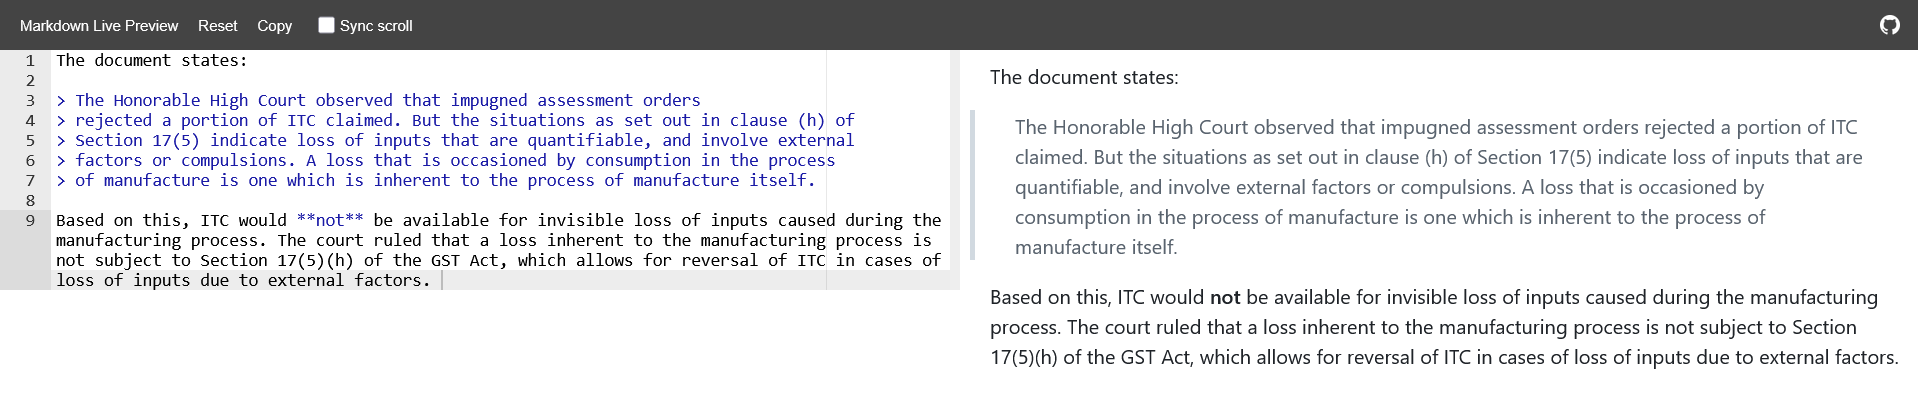